# Deep Learning

### Part A - Deep Learning model

#### Data Preprocessing

In [1]:
import numpy as np
import os
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X_list = []
for filename in sorted(os.listdir('../Final Project/Dataset_Resize/')):
    img = image.load_img(Path('../Final Project/Dataset_Resize/', filename), target_size=(32,32))
    X_list.append(image.img_to_array(img))
X = np.array(X_list)
X.shape

(9850, 32, 32, 3)

In [4]:
df = pd.read_csv('../Final Project/vehicles.csv')
df_dummy = pd.get_dummies(df['Vehicle_Type'])
Y = np.array(df_dummy)
Y.shape

(9850, 6)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

#### CNN Deep Learning model:

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam, Adadelta
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping

In [7]:
def model(activation, loss, opt, input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(96, (3,3), strides=(2,2), activation=activation, padding='same', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(BatchNormalization())

    model.add(Conv2D(256, (5,5), activation=activation, padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
    model.add(BatchNormalization())

    model.add(Conv2D(384, (3,3), activation=activation, padding='same'))
    model.add(Conv2D(384, (3,3), activation=activation, padding='same'))
    model.add(Conv2D(256, (3,3), activation=activation, padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(4096, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))

    # determine Loss function and Optimizer
    # opt = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-6)
    model.compile(loss=loss,
                  optimizer=opt,
                  metrics=['accuracy'])
    return model;

Activation Functions: Rectified linear unit (ReLU) <br>
Cost Function: categorical_crossentropy <br>
Epochs: 20 <br>
Gradient Estimation：Adam <br>
Network Architecture：5 convolutional layers and 3 fully connected layers

In [8]:
adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-6)
model_a = model('relu', 'categorical_crossentropy', adam, (32,32,3), 6)

In [9]:
early_Stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    verbose=0, 
    mode='auto'
)
reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=0, mode='auto', epsilon=0.0001, cooldown=0, min_lr=0)

In [17]:
history_a = model_a.fit(X_train, Y_train,
                   batch_size=256,
                   epochs=20,
                   verbose=1,
                   validation_data=(X_test, Y_test),
                   shuffle=True,
                   callbacks=[early_Stopping,reduceLR])

Train on 7880 samples, validate on 1970 samples
Epoch 1/20
7880/7880 [==============================] - 209s 27ms/step - loss: 1.1130 - acc: 0.6374 - val_loss: 0.7401 - val_acc: 0.7629
Epoch 2/20
7880/7880 [==============================] - 195s 25ms/step - loss: 0.4081 - acc: 0.8703 - val_loss: 0.4725 - val_acc: 0.8553
Epoch 3/20
7880/7880 [==============================] - 194s 25ms/step - loss: 0.1745 - acc: 0.9445 - val_loss: 0.4258 - val_acc: 0.8680
Epoch 4/20
7880/7880 [==============================] - 187s 24ms/step - loss: 0.1017 - acc: 0.9673 - val_loss: 0.4601 - val_acc: 0.8853
Epoch 5/20
7880/7880 [==============================] - 190s 24ms/step - loss: 0.0428 - acc: 0.9877 - val_loss: 0.5057 - val_acc: 0.8827
Epoch 6/20
7880/7880 [==============================] - 198s 25ms/step - loss: 0.0270 - acc: 0.9914 - val_loss: 0.5165 - val_acc: 0.8848
Epoch 7/20
7880/7880 [==============================] - 184s 23ms/step - loss: 0.0329 - acc: 0.9891 - val_loss: 0.5928 - val_acc: 

### Part B - Activation function

Change activation function to Exponential linear unit (ELU)

In [11]:
model_b = model('elu', 'categorical_crossentropy', adam, (32,32,3), 6)

In [12]:
history_b = model_b.fit(X_train, Y_train,
                   batch_size=256,
                   epochs=20,
                   verbose=1,
                   validation_data=(X_test, Y_test),
                   shuffle=True,
                   callbacks=[early_Stopping,reduceLR])

Train on 7880 samples, validate on 1970 samples
Epoch 1/20
7880/7880 [==============================] - 184s 23ms/step - loss: 1.1262 - acc: 0.6437 - val_loss: 0.6279 - val_acc: 0.8066
Epoch 2/20
7880/7880 [==============================] - 183s 23ms/step - loss: 0.4033 - acc: 0.8732 - val_loss: 0.4452 - val_acc: 0.8635
Epoch 3/20
7880/7880 [==============================] - 183s 23ms/step - loss: 0.2378 - acc: 0.9236 - val_loss: 0.5289 - val_acc: 0.8624
Epoch 4/20
7880/7880 [==============================] - 182s 23ms/step - loss: 0.1231 - acc: 0.9581 - val_loss: 0.4107 - val_acc: 0.9025
Epoch 5/20
7880/7880 [==============================] - 182s 23ms/step - loss: 0.0559 - acc: 0.9817 - val_loss: 0.4309 - val_acc: 0.8980
Epoch 6/20
7880/7880 [==============================] - 182s 23ms/step - loss: 0.0252 - acc: 0.9915 - val_loss: 0.4915 - val_acc: 0.8934
Epoch 7/20
7880/7880 [==============================] - 181s 23ms/step - loss: 0.0227 - acc: 0.9926 - val_loss: 0.3487 - val_acc: 

#### Change the activation function. How does it effect the accuracy?<br>
#### How does it effect how quickly the network plateaus?

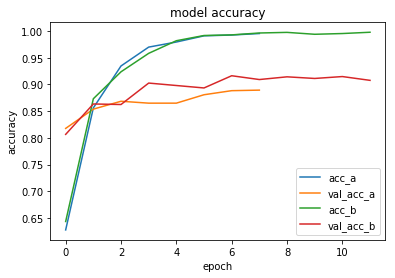

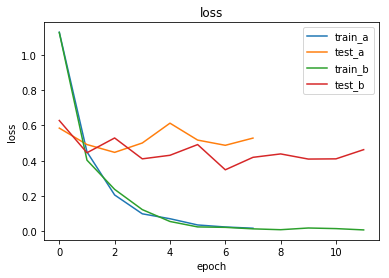

In [29]:
# summarize history for accuracy
plt.plot()
plt.plot(history_a.history['acc'])
plt.plot(history_a.history['val_acc'])
plt.plot(history_b.history['acc'])
plt.plot(history_b.history['val_acc'])   
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['acc_a', 'val_acc_a', 'acc_b', 'val_acc_b'], loc=0)  
plt.show() 
# summarize history for loss  
plt.plot(history_a.history['loss'])  
plt.plot(history_a.history['val_loss'])
plt.plot(history_b.history['loss'])  
plt.plot(history_b.history['val_loss'])
plt.title('loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train_a', 'test_a','train_b', 'test_b'], loc=0)  
plt.show() 

### Part C - Cost function

Change cost function to categorical_hinge

In [19]:
model_c = model('relu', 'categorical_hinge', adam, (32,32,3), 6)

In [20]:
history_c = model_c.fit(X_train, Y_train,
                   batch_size=256,
                   epochs=20,
                   verbose=1,
                   validation_data=(X_test, Y_test),
                   shuffle=True,
                   callbacks=[early_Stopping,reduceLR])

Train on 7880 samples, validate on 1970 samples
Epoch 1/20
7880/7880 [==============================] - 200s 25ms/step - loss: 0.7261 - acc: 0.6025 - val_loss: 0.5111 - val_acc: 0.7406
Epoch 2/20
7880/7880 [==============================] - 183s 23ms/step - loss: 0.4410 - acc: 0.7746 - val_loss: 0.4412 - val_acc: 0.7782
Epoch 3/20
7880/7880 [==============================] - 224s 28ms/step - loss: 0.3386 - acc: 0.8280 - val_loss: 0.3008 - val_acc: 0.8503
Epoch 4/20
7880/7880 [==============================] - 200s 25ms/step - loss: 0.2763 - acc: 0.8617 - val_loss: 0.3218 - val_acc: 0.8406
Epoch 5/20
7880/7880 [==============================] - 182s 23ms/step - loss: 0.2470 - acc: 0.8756 - val_loss: 0.3404 - val_acc: 0.8294
Epoch 6/20
7880/7880 [==============================] - 190s 24ms/step - loss: 0.2508 - acc: 0.8754 - val_loss: 0.2882 - val_acc: 0.8574
Epoch 7/20
7880/7880 [==============================] - 195s 25ms/step - loss: 0.2002 - acc: 0.9008 - val_loss: 0.2890 - val_acc: 

#### Change the cost function. How does it effect the accuracy?<br>
#### How does it effect how quickly the network plateaus?

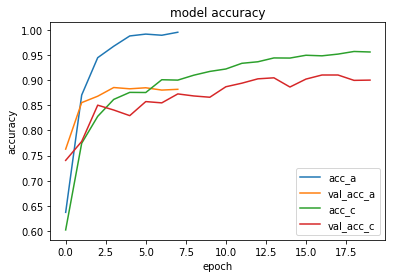

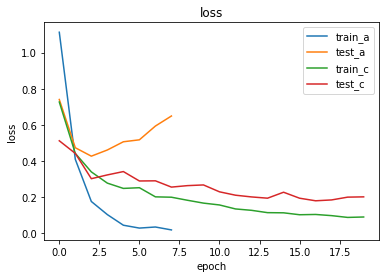

In [21]:
# summarize history for accuracy
plt.plot()
plt.plot(history_a.history['acc'])
plt.plot(history_a.history['val_acc'])
plt.plot(history_c.history['acc'])
plt.plot(history_c.history['val_acc'])   
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['acc_a', 'val_acc_a', 'acc_c', 'val_acc_c'], loc=0)  
plt.show() 
# summarize history for loss  
plt.plot(history_a.history['loss'])  
plt.plot(history_a.history['val_loss'])
plt.plot(history_c.history['loss'])  
plt.plot(history_c.history['val_loss'])
plt.title('loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train_a', 'test_a','train_c', 'test_c'], loc=0)  
plt.show()

### Part D - Epochs

Change epochs to 40

In [24]:
history_d = model_c.fit(X_train, Y_train,
                   batch_size=256,
                   epochs=40,
                   verbose=1,
                   validation_data=(X_test, Y_test),
                   shuffle=True,
                   callbacks=[early_Stopping,reduceLR])

Train on 7880 samples, validate on 1970 samples
Epoch 1/40
7880/7880 [==============================] - 194s 25ms/step - loss: 0.0701 - acc: 0.9648 - val_loss: 0.1960 - val_acc: 0.9005
Epoch 2/40
7880/7880 [==============================] - 190s 24ms/step - loss: 0.0605 - acc: 0.9699 - val_loss: 0.1761 - val_acc: 0.9127
Epoch 3/40
7880/7880 [==============================] - 195s 25ms/step - loss: 0.0592 - acc: 0.9704 - val_loss: 0.1682 - val_acc: 0.9157
Epoch 4/40
7880/7880 [==============================] - 195s 25ms/step - loss: 0.0612 - acc: 0.9697 - val_loss: 0.1837 - val_acc: 0.9066
Epoch 5/40
7880/7880 [==============================] - 184s 23ms/step - loss: 0.0610 - acc: 0.9695 - val_loss: 0.1578 - val_acc: 0.9193
Epoch 6/40
7880/7880 [==============================] - 182s 23ms/step - loss: 0.0628 - acc: 0.9685 - val_loss: 0.1734 - val_acc: 0.9132
Epoch 7/40
7880/7880 [==============================] - 190s 24ms/step - loss: 0.0649 - acc: 0.9678 - val_loss: 0.1887 - val_acc: 

#### Change the number of epochs initialization. How does it effect the accuracy?<br>
#### How quickly does the network plateau?

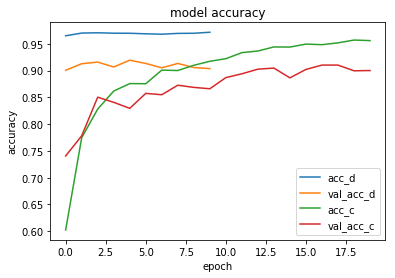

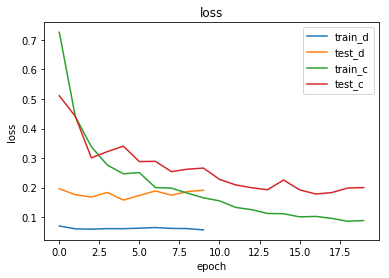

In [25]:
# summarize history for accuracy
plt.plot()
plt.plot(history_d.history['acc'])
plt.plot(history_d.history['val_acc'])
plt.plot(history_c.history['acc'])
plt.plot(history_c.history['val_acc'])   
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['acc_d', 'val_acc_d', 'acc_c', 'val_acc_c'], loc=0)  
plt.show() 
# summarize history for loss  
plt.plot(history_d.history['loss'])  
plt.plot(history_d.history['val_loss'])
plt.plot(history_c.history['loss'])  
plt.plot(history_c.history['val_loss'])
plt.title('loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train_d', 'test_d','train_c', 'test_c'], loc=0)  
plt.show()

### Part E - Gradient estimation

Change gradient estimation to Adadelta

In [13]:
adadelta = Adadelta(lr=0.01, rho=0.95, epsilon=None, decay=0.0)
model_e = model('relu', 'categorical_crossentropy', adadelta, (32,32,3), 6)

In [14]:
history_e = model_e.fit(X_train, Y_train,
                   batch_size=256,
                   epochs=20,
                   verbose=1,
                   validation_data=(X_test, Y_test),
                   shuffle=True,
                   callbacks=[early_Stopping,reduceLR])

Train on 7880 samples, validate on 1970 samples
Epoch 1/20
7880/7880 [==============================] - 277s 35ms/step - loss: 1.7312 - acc: 0.3404 - val_loss: 1.3827 - val_acc: 0.6076
Epoch 2/20
7880/7880 [==============================] - 233s 30ms/step - loss: 1.3836 - acc: 0.5406 - val_loss: 1.0670 - val_acc: 0.7030
Epoch 3/20
7880/7880 [==============================] - 322s 41ms/step - loss: 1.0828 - acc: 0.6556 - val_loss: 0.8282 - val_acc: 0.7553
Epoch 4/20
7880/7880 [==============================] - 245s 31ms/step - loss: 0.8472 - acc: 0.7355 - val_loss: 0.7232 - val_acc: 0.7838
Epoch 5/20
7880/7880 [==============================] - 290s 37ms/step - loss: 0.6886 - acc: 0.7873 - val_loss: 0.6568 - val_acc: 0.7990
Epoch 6/20
7880/7880 [==============================] - 327s 42ms/step - loss: 0.5561 - acc: 0.8263 - val_loss: 0.5958 - val_acc: 0.8183
Epoch 7/20
7880/7880 [==============================] - 282s 36ms/step - loss: 0.4556 - acc: 0.8629 - val_loss: 0.5865 - val_acc: 

#### Change the gradient estimation. How does it effect the accuracy?<br>
#### How does it effect how quickly the network plateaus?

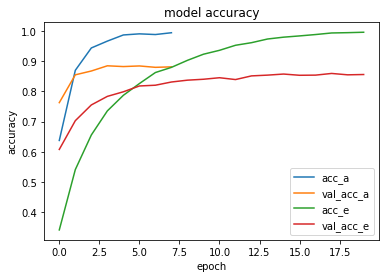

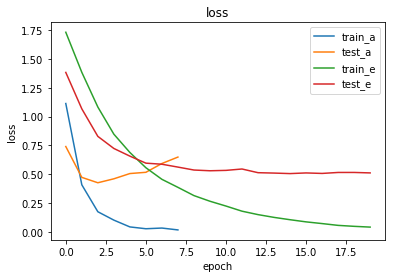

In [18]:
# summarize history for accuracy
plt.plot()
plt.plot(history_a.history['acc'])
plt.plot(history_a.history['val_acc'])
plt.plot(history_e.history['acc'])
plt.plot(history_e.history['val_acc'])   
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['acc_a', 'val_acc_a', 'acc_e', 'val_acc_e'], loc=0)  
plt.show() 
# summarize history for loss  
plt.plot(history_a.history['loss'])  
plt.plot(history_a.history['val_loss'])
plt.plot(history_e.history['loss'])  
plt.plot(history_e.history['val_loss'])
plt.title('loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train_a', 'test_a','train_e', 'test_e'], loc=0)  
plt.show()

### Part F - Network Architecture

Change to another cnn architecture:<br>
7 convolutional layers and 3 fully connected layers, change parameters and activation functions of fully connected layers.

In [18]:
def model_2(input_shape):
    model = Sequential()
    model.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(BatchNormalization())

    model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(BatchNormalization())

    model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model;

In [19]:
model_f = model_2((32,32,3))

In [20]:
history_f = model_f.fit(X_train, Y_train,
                   batch_size=256,
                   epochs=20,
                   verbose=1,
                   validation_data=(X_test, Y_test),
                   shuffle=True,
                   callbacks=[early_Stopping,reduceLR])

Train on 7880 samples, validate on 1970 samples
Epoch 1/20
7880/7880 [==============================] - 375s 48ms/step - loss: 6.4717 - acc: 0.5802 - val_loss: 6.8727 - val_acc: 0.5736
Epoch 2/20
7880/7880 [==============================] - 372s 47ms/step - loss: 6.6150 - acc: 0.5896 - val_loss: 6.8727 - val_acc: 0.5736
Epoch 3/20
7880/7880 [==============================] - 369s 47ms/step - loss: 6.6150 - acc: 0.5896 - val_loss: 6.8727 - val_acc: 0.5736
Epoch 4/20
7880/7880 [==============================] - 366s 46ms/step - loss: 6.6150 - acc: 0.5896 - val_loss: 6.8727 - val_acc: 0.5736
Epoch 5/20
7880/7880 [==============================] - 367s 47ms/step - loss: 6.6150 - acc: 0.5896 - val_loss: 6.8727 - val_acc: 0.5736
Epoch 6/20
7880/7880 [==============================] - 366s 46ms/step - loss: 6.6150 - acc: 0.5896 - val_loss: 6.8727 - val_acc: 0.5736


#### Change the network architecture. How does it effect the accuracy?<br>
#### How does it effect how quickly the network plateaus?

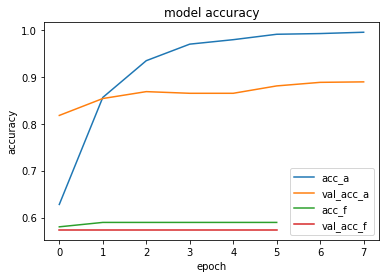

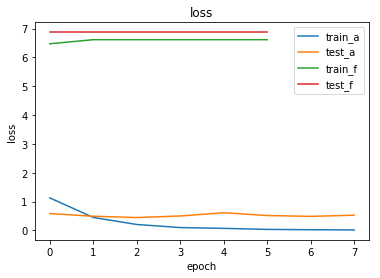

In [33]:
# summarize history for accuracy
plt.plot()
plt.plot(history_a.history['acc'])
plt.plot(history_a.history['val_acc'])
plt.plot(history_f.history['acc'])
plt.plot(history_f.history['val_acc'])   
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['acc_a', 'val_acc_a', 'acc_f', 'val_acc_f'], loc=0)  
plt.show() 
# summarize history for loss  
plt.plot(history_a.history['loss'])  
plt.plot(history_a.history['val_loss'])
plt.plot(history_f.history['loss'])  
plt.plot(history_f.history['val_loss'])
plt.title('loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train_a', 'test_a','train_f', 'test_f'], loc=0)  
plt.show()

### Part G - Network initialization

Change weight initializer from glorot_uniform to he_uniform and bias initializer from 0 to 0.01

In [21]:
constant = keras.initializers.Constant(value=0.01)

def model_3(input_shape):
    model = Sequential()
    model.add(Conv2D(96, (3,3), strides=(2,2), activation='relu', kernel_initializer='he_uniform', bias_initializer=constant, padding='same', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(BatchNormalization())

    model.add(Conv2D(256, (5,5), activation='relu', kernel_initializer='he_uniform', bias_initializer=constant, padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
    model.add(BatchNormalization())

    model.add(Conv2D(384, (3,3), activation='relu', kernel_initializer='he_uniform', bias_initializer=constant, padding='same'))
    model.add(Conv2D(384, (3,3), activation='relu', kernel_initializer='he_uniform', bias_initializer=constant, padding='same'))
    model.add(Conv2D(256, (3,3), activation='relu', kernel_initializer='he_uniform', bias_initializer=constant, padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2,2)))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(4096, activation='tanh', kernel_initializer='he_uniform', bias_initializer=constant))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='tanh', kernel_initializer='he_uniform', bias_initializer=constant))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model;

In [22]:
model_g = model_3((32,32,3))

In [23]:
history_g = model_g.fit(X_train, Y_train,
                   batch_size=256,
                   epochs=20,
                   verbose=1,
                   validation_data=(X_test, Y_test),
                   shuffle=True,
                   callbacks=[early_Stopping,reduceLR])

Train on 7880 samples, validate on 1970 samples
Epoch 1/20
7880/7880 [==============================] - 183s 23ms/step - loss: 3.6378 - acc: 0.4313 - val_loss: 1.3390 - val_acc: 0.5883
Epoch 2/20
7880/7880 [==============================] - 181s 23ms/step - loss: 1.2123 - acc: 0.6214 - val_loss: 1.0028 - val_acc: 0.6569
Epoch 3/20
7880/7880 [==============================] - 181s 23ms/step - loss: 0.9585 - acc: 0.6852 - val_loss: 0.8005 - val_acc: 0.7091
Epoch 4/20
7880/7880 [==============================] - 181s 23ms/step - loss: 0.6714 - acc: 0.7792 - val_loss: 0.5834 - val_acc: 0.8056
Epoch 5/20
7880/7880 [==============================] - 181s 23ms/step - loss: 0.5377 - acc: 0.8282 - val_loss: 0.5554 - val_acc: 0.8137
Epoch 6/20
7880/7880 [==============================] - 182s 23ms/step - loss: 0.4361 - acc: 0.8579 - val_loss: 0.5495 - val_acc: 0.8365
Epoch 7/20
7880/7880 [==============================] - 181s 23ms/step - loss: 0.3003 - acc: 0.9034 - val_loss: 0.5831 - val_acc: 

#### Change the network initialization.  How does it effect the accuracy?<br>
#### How does it effect how quickly the network plateaus?

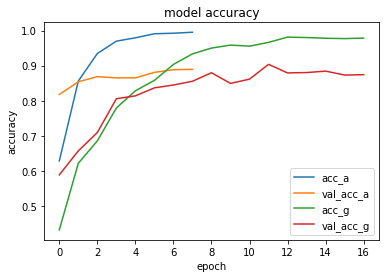

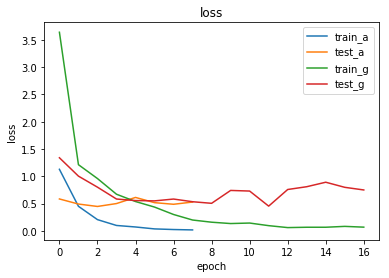

In [34]:
# summarize history for accuracy
plt.plot()
plt.plot(history_a.history['acc'])
plt.plot(history_a.history['val_acc'])
plt.plot(history_g.history['acc'])
plt.plot(history_g.history['val_acc'])   
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['acc_a', 'val_acc_a', 'acc_g', 'val_acc_g'], loc=0)  
plt.show() 
# summarize history for loss  
plt.plot(history_a.history['loss'])  
plt.plot(history_a.history['val_loss'])
plt.plot(history_g.history['loss'])  
plt.plot(history_g.history['val_loss'])
plt.title('loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train_a', 'test_a','train_g', 'test_g'], loc=0)  
plt.show()

#### Summary:

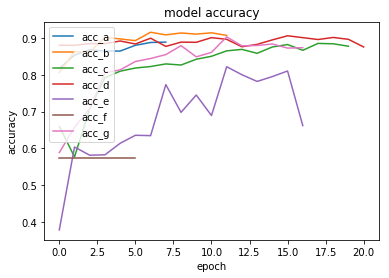

In [24]:
# summarize history for test accuracy
plt.plot()  
plt.plot(history_a.history['val_acc']) 
plt.plot(history_b.history['val_acc'])  
plt.plot(history_c.history['val_acc']) 
plt.plot(history_d.history['val_acc']) 
plt.plot(history_e.history['val_acc']) 
plt.plot(history_f.history['val_acc'])  
plt.plot(history_g.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['acc_a', 'acc_b','acc_c','acc_d','acc_e','acc_f','acc_g'], loc='upper left')  
plt.show()  

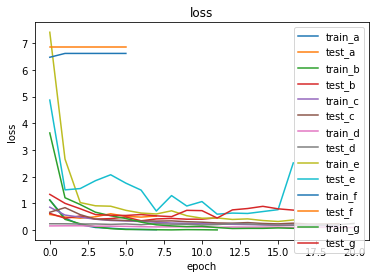

In [25]:
# summarize history for loss  
plt.plot(history_a.history['loss'])  
plt.plot(history_a.history['val_loss'])
plt.plot(history_b.history['loss'])  
plt.plot(history_b.history['val_loss'])
plt.plot(history_c.history['loss'])  
plt.plot(history_c.history['val_loss'])
plt.plot(history_d.history['loss'])  
plt.plot(history_d.history['val_loss']) 
plt.plot(history_e.history['loss'])  
plt.plot(history_e.history['val_loss']) 
plt.plot(history_f.history['loss'])  
plt.plot(history_f.history['val_loss']) 
plt.plot(history_g.history['loss'])  
plt.plot(history_g.history['val_loss']) 
plt.title('loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train_a', 'test_a','train_b', 'test_b','train_c', 'test_c','train_d', 'test_d','train_e', 'test_e','train_f', 'test_f','train_g', 'test_g'], loc='upper right')  
plt.show() 